# SCOG Trip Generation

## Cross-class trip rates

michael.mccarthy@rsginc.com


In [5]:
# setup
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# read in survey tables: households and trips

trips = pd.read_csv('data/trip.csv')
hh = pd.read_csv('data/hh.csv')



In [4]:
#Get specific variables for HH characteristics
hh["hh_size"] = np.where(hh["num_people"]>3, 4, hh["num_people"])
hh["w_size"] = np.where(hh["num_workers"]>2, 3, hh["num_workers"])

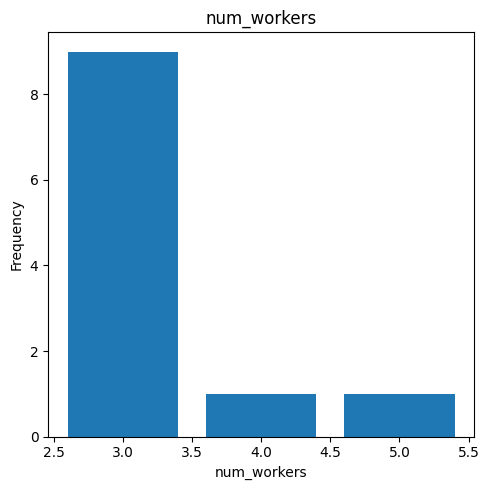

In [6]:
hh["num_workers"].unique()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

counts = hh[hh['num_workers']>2]['num_workers'].value_counts()
axes.bar(counts.index, counts.values)
axes.set_title('num_workers')
axes.set_xlabel('num_workers')
axes.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [1]:
# TAZ income category: INC1 < 25k; INC2 25-50k; INC3 50-75k; INC4 >75k
# income_broad	1	Under $25,000
# income_broad	2	$25,000-$49,999
# income_broad	3	$50,000-$74,999
# income_broad	4	$75,000-$99,999
# income_broad	5	$100,000-$199,999
# income_broad	6	$200,000 or more
# income_broad	999	Prefer not to answer

income_cat = [
    (hh['income_broad'] == 999),
    (hh['income_broad'] == 1),
    (hh['income_broad'] == 2),
    (hh['income_broad'] == 3),
    (hh['income_broad'] >= 4)
]
income_cat_labels = ['NA','INC1','INC2','INC3','INC4']
hh["hh_inc"] = np.select(income_cat, income_cat_labels, default='NA')

hh["hh_inc"].unique()

NameError: name 'hh' is not defined

In [9]:
hh[hh["hh_inc"]=='NA']

# 77 HH entries without income level (out of 672 rows)

,bicycle_type_electric,bicycle_type_other,bicycle_type_standard,bike_store_garage,bike_store_house,bike_store_locker,bike_store_other,bike_store_other_object,bike_store_rack,bike_store_secured_room,...,num_workers,participation_group,residence_rent_own,residence_type,sample_home_bg,sample_segment,hh_weight,hh_size,w_size,hh_inc
1,1,0,0,0,1,0,0,0,0,0,...,0,1,1,1,530579402002,1,13.062519,2,0,NA
2,995,995,995,995,995,995,995,995,995,995,...,0,1,999,1,530579403002,1,19.533518,2,0,NA
10,0,0,1,0,1,0,0,0,0,0,...,2,1,1,1,530579516003,1,86.582026,3,2,NA
14,995,995,995,995,995,995,995,995,995,995,...,2,3,1,1,530579524011,2,55.544301,2,2,NA
21,0,0,1,0,1,0,0,0,0,0,...,0,1,1,1,530579403003,1,19.294569,2,0,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,0,0,1,0,1,0,0,0,0,0,...,0,1,1,1,530579508001,2,15.365910,1,0,NA
628,995,995,995,995,995,995,995,995,995,995,...,0,1,1,1,530579511004,1,23.661309,2,0,NA
636,995,995,995,995,995,995,995,995,995,995,...,0,1,1,1,530579524011,2,9.316400,2,0,NA
651,995,995,995,995,995,995,995,995,995,995,...,0,1,1,1,530579524023,1,19.981104,1,0,NA


## Trip Purposes

In [13]:
purp_cat = [
    ((trips['o_purpose'] == 1) & (trips['d_purpose'] == 1)), # Loop trip home to home
    ((trips['o_purpose'] == 151) | (trips['d_purpose'] == 151)) , # Loop trip (split by analyst)
    ((trips['o_purpose_category'] == 1) & (trips['d_purpose_category'].isin([2,3]))), # HBW PA trip
    ((trips['o_purpose_category'].isin([2,3])) & (trips['d_purpose_category'] == 1)), # HBW AP trip
    ((trips['o_purpose_category'] == 1) & ~(trips['d_purpose_category'].isin([2,3]))), # HBO PA trip
    (~(trips['o_purpose_category'].isin([2,3])) & (trips['d_purpose_category'] == 1)), # HBO AP trip
    ((trips['o_purpose_category'].isin([2,3])) | (trips['d_purpose_category'].isin([2,3]))), # NHBW trip
    (~(trips['o_purpose_category'].isin([2,3])) & ~(trips['d_purpose_category'].isin([2,3]))), # NHBO trip
    True
]
# evaluates to first true condition
purp_cat_labels = ['Loop','Loop','HBW','HBW','HBO','HBO','NHBW','NHBO','NA']
trips['model_purpose'] = np.select(purp_cat, purp_cat_labels, default='NA')

In [14]:
trips['model_purpose'].value_counts()

model_purpose
HBO     6979
NHBO    4807
NHBW    1630
HBW     1204
Loop      37
Name: count, dtype: int64